<a href="https://colab.research.google.com/github/Joyabbey21/StageE-TagAlong-Code/blob/main/Scraping_Amazon_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd


In [ ]:
#name url to be scraped
book_url = "https://www.amazon.com/gp/bestsellers/books/ref=zg_bsar_cal_ye"

**Extracting best selling books data**

In [ ]:
#Define a variable to store information about books
best_selling_book_array = []
for i in range(2008,2020):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    r = requests.get(f'https://www.amazon.com/gp/bestsellers/{i}/books/ref=zg_bsar_cal_ye', headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    for d in soup.find_all('div', attrs={'id':'gridItemRoot'}):
        title = d.find('div', attrs={'class':'_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y'})
        #title1 = title.find('img', alt=True)
        author = d.find('a', attrs={'class':'a-size-small a-link-child'}) #get author name
        book_rating = d.find('span', attrs={'class':'a-icon-alt'}) # get book rating
        no_of_reviews = d.find('span', attrs={'class':'a-size-small'}) # get book rating
        price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'}) # get price
        
        book=[]
        # allowing for exceptions when scrapping information from the website
        if title is not None:
            book.append(title.text)
        else:
            book.append('unknown_product')

        if author is not None:
            book.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                book.append(author.text)
            else:
                book.append('0')

        if book_rating is not None:
            book.append(book_rating.text)
        else:
            book.append('-1')

        if no_of_reviews is not None:
            book.append(no_of_reviews.text)
        else:
            book.append('0')

        if price is not None:
            book.append(price.text)
        else:
            book.append('0')


        # adding year
        book.append(i)
        # adding all infornmation about each book to the outer list
        best_selling_book_array.append(book)

In [ ]:
#Display books information
best_selling_book_array

[["A New Earth: Awakening to Your Life's Purpose (Oprah's Book Club, Selection 61)",
  'Eckhart Tolle',
  '4.7 out of 5 stars',
  '12,080',
  '$9.44',
  2008],
 ['Breaking Dawn (The Twilight Saga, Book 4)',
  'Stephenie Meyer',
  '4.7 out of 5 stars',
  '16,930',
  '$10.54',
  2008],
 ['The Shack: Where Tragedy Confronts Eternity',
  'William P. Young',
  '4.7 out of 5 stars',
  '23,402',
  '$10.43',
  2008],
 ['The Last Lecture',
  'Randy Pausch',
  '4.7 out of 5 stars',
  '5,911',
  '$9.69',
  2008],
 ['The Tales of Beedle the Bard, Standard Edition (Harry Potter)',
  'J. K. Rowling',
  '4.6 out of 5 stars',
  '10,855',
  '$10.13',
  2008],
 ['Eclipse (Twilight)',
  'Stephenie Meyer',
  '4.7 out of 5 stars',
  '12,788',
  '$18.81',
  2008],
 ['Twilight (The Twilight Saga, Book 1)',
  'Stephenie Meyer',
  '4.7 out of 5 stars',
  '22,129',
  '0',
  2008],
 ['New Moon (The Twilight Saga)',
  'Stephenie Meyer',
  '4.7 out of 5 stars',
  '12,343',
  '$17.47',
  2008],
 ['StrengthsFinder 2

In [ ]:
# Check total number of books
print("Total books",len(best_selling_book_array))

Total books 360


In [ ]:
book_df = pd.DataFrame(best_selling_book_array, columns=['Book_Name', 'Author_name', 'User_Rating', 'No_of_Reviews', 'Price(in dollar)', 'Year'])
book_df.head()


,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar),Year
0,A New Earth: Awakening to Your Life's Purpose ...,Eckhart Tolle,4.7 out of 5 stars,"12,080",$9.44,2008
1,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7 out of 5 stars,"16,930",$10.54,2008
2,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7 out of 5 stars,"23,402",$10.43,2008
3,The Last Lecture,Randy Pausch,4.7 out of 5 stars,"5,911",$9.69,2008
4,"The Tales of Beedle the Bard, Standard Edition...",J. K. Rowling,4.6 out of 5 stars,"10,855",$10.13,2008


In [ ]:
#check data types
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Book_Name         360 non-null    object
 1   Author_name       360 non-null    object
 2   User_Rating       360 non-null    object
 3   No_of_Reviews     360 non-null    object
 4   Price(in dollar)  360 non-null    object
 5   Year              360 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 17.0+ KB


In [ ]:
book_df["Year"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [ ]:
#Remove 2008
req_years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019]
book_df = book_df[book_df['Year'].isin(req_years)]
book_df.head()

,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar),Year
30,The Lost Symbol,Dan Brown,4.4 out of 5 stars,"16,136",$14.71,2009
31,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7 out of 5 stars,"23,402",$10.43,2009
32,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8 out of 5 stars,"5,037",$9.94,2009
33,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7 out of 5 stars,"16,930",$10.54,2009
34,Going Rogue: An American Life,Sarah Palin,4.6 out of 5 stars,"1,572",$10.00,2009


In [ ]:
#Extract user rating value and convert to float
book_df["User_Rating"] = book_df["User_Rating"].apply(lambda x: float(x.split(" ")[0]))
book_df.head()

,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar),Year
30,The Lost Symbol,Dan Brown,4.4,"16,136",$14.71,2009
31,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,"23,402",$10.43,2009
32,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,"5,037",$9.94,2009
33,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,"16,930",$10.54,2009
34,Going Rogue: An American Life,Sarah Palin,4.6,"1,572",$10.00,2009


In [ ]:
#Extract user rating value and convert to float
book_df["Price(in dollar)"] = book_df["Price(in dollar)"].apply(lambda x: x.replace("$",""))
book_df.head()

,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar),Year
30,The Lost Symbol,Dan Brown,4.4,"16,136",14.71,2009
31,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,"23,402",10.43,2009
32,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,"5,037",9.94,2009
33,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,"16,930",10.54,2009
34,Going Rogue: An American Life,Sarah Palin,4.6,"1,572",10.00,2009


In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 30 to 359
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Book_Name         330 non-null    object 
 1   Author_name       330 non-null    object 
 2   User_Rating       330 non-null    float64
 3   No_of_Reviews     330 non-null    object 
 4   Price(in dollar)  330 non-null    object 
 5   Year              330 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 18.0+ KB


In [ ]:
#Convert price to float
book_df["Price(in dollar)"] = book_df["Price(in dollar)"].astype(float)
book_df.head()

,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar),Year
30,The Lost Symbol,Dan Brown,4.4,"16,136",14.71,2009
31,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,"23,402",10.43,2009
32,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,"5,037",9.94,2009
33,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,"16,930",10.54,2009
34,Going Rogue: An American Life,Sarah Palin,4.6,"1,572",10.00,2009


In [ ]:
book_df.columns

Index(['Book_Name', 'Author_name', 'User_Rating', 'No_of_Reviews',
       'Price(in dollar)', 'Year'],
      dtype='object')

In [ ]:
book_df.head()

,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar),Year
30,The Lost Symbol,Dan Brown,4.4,"16,136",14.71,2009
31,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,"23,402",10.43,2009
32,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,"5,037",9.94,2009
33,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,"16,930",10.54,2009
34,Going Rogue: An American Life,Sarah Palin,4.6,"1,572",10.00,2009


In [ ]:
#Rearrange column
book_df = book_df.loc[:,['Year','Book_Name', 'Author_name', 'User_Rating', 'No_of_Reviews','Price(in dollar)']]
book_df.head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
30,2009,The Lost Symbol,Dan Brown,4.4,"16,136",14.71
31,2009,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,"23,402",10.43
32,2009,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,"5,037",9.94
33,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,"16,930",10.54
34,2009,Going Rogue: An American Life,Sarah Palin,4.6,"1,572",10.00


In [ ]:
#reset index
book_df.reset_index(drop=True,inplace=True)

In [ ]:
book_df.head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
0,2009,The Lost Symbol,Dan Brown,4.4,"16,136",14.71
1,2009,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,"23,402",10.43
2,2009,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,"5,037",9.94
3,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,"16,930",10.54
4,2009,Going Rogue: An American Life,Sarah Palin,4.6,"1,572",10.00


In [ ]:
#Remove comma from reviews
.apply(lambda x: x.replace(",",""))
book_df.head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
0,2009,The Lost Symbol,Dan Brown,4.4,16136,14.71
1,2009,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,23402,10.43
2,2009,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,5037,9.94
3,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,16930,10.54
4,2009,Going Rogue: An American Life,Sarah Palin,4.6,1572,10.00


In [ ]:
book_df.isnull().sum()

Year                0
Book_Name           0
Author_name         0
User_Rating         0
No_of_Reviews       0
Price(in dollar)    0
dtype: int64

In [ ]:
book_df.sort_values("Year",ascending=True).head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
0,2009,The Lost Symbol,Dan Brown,4.4,16136,14.71
29,2009,Eclipse (Twilight Sagas),Stephenie Meyer,4.7,12788,20.31
28,2009,Good to Great: Why Some Companies Make the Lea...,Jim Collins,4.5,5811,16.50
27,2009,The 5000 Year Leap,W. Cleon Skousen,4.8,2566,16.60
26,2009,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.5,15488,7.76


In [ ]:
book_df.describe()

,Year,User_Rating,Price(in dollar)
count,30.0,30.000000,30.000000
mean,2019.0,4.776667,9.780667
std,0.0,0.122287,4.776433
min,2019.0,4.500000,4.140000
25%,2019.0,4.725000,6.547500
50%,2019.0,4.800000,8.515000
75%,2019.0,4.900000,11.740000
max,2019.0,4.900000,22.990000


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [ ]:
book_df.head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
0,2009,The Lost Symbol,Dan Brown,4.4,16136,14.71
1,2009,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,23402,10.43
2,2009,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,5037,9.94
3,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,16930,10.54
4,2009,Going Rogue: An American Life,Sarah Palin,4.6,1572,10.00


<Figure size 1224x576 with 0 Axes>

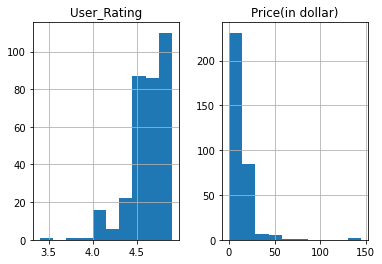

In [ ]:
plt.figure(figsize=(17,8))
book_df[["User_Rating", "Price(in dollar)"]].hist()
plt.show()


In [ ]:
import re
def get_int(value):
  pattern = "\d+"
  result = re.search(pattern,value)
  if result == None:
    return None

  else:

    return  result[0]

print(get_int("2270"))

In [ ]:
book_df["No_of_Reviews"] = book_df["No_of_Reviews"].apply(lambda x:get_int(x))
book_df.head()

In [ ]:
x=book_df[book_df["User_Rating"]==4.9]
x.head(10)

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
80,2011,"Jesus Calling, Padded Hardcover, with Scriptur...",Sarah Young,4.9,31213,7.53
118,2012,"Oh, the Places You'll Go!",Dr. Seuss,4.9,42931,8.48
123,2013,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9,9351,10.25
124,2013,"Jesus Calling, Padded Hardcover, with Scriptur...",Sarah Young,4.9,31213,7.53
140,2013,"Oh, the Places You'll Go!",Dr. Seuss,4.9,42931,8.48
157,2014,"Jesus Calling, Padded Hardcover, with Scriptur...",Sarah Young,4.9,31213,7.53
163,2014,"Oh, the Places You'll Go!",Dr. Seuss,4.9,42931,8.48
173,2014,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,5034,9.99
178,2014,Little Blue Truck,Alice Schertle,4.9,1959,0.00
194,2015,Humans of New York : Stories,Brandon Stanton,4.9,5062,16.12


In [ ]:
book_df["No_of_Reviews"].unique()

array(['16136', '23402', '5037', '16930', '1572', 'Gallup', '18095',
       '12343', '6105', '22234', '12788', '22129', '1421', '3498', '3305',
       '7045', '7987', '9120', '14909', '930', '895', '7581', '995',
       '6611', '12677', '509', '15488', '2566', '5811', '21762', '2399',
       '10604', '37073', '1969', '612', '5902', '2496', '33642', '3306',
       '1783', '1920', '6169', '4707', '6798', '576', 'The College Board',
       '1358', '16953', '11573', '860', '32493', 'Patrick Lencioni',
       '12792', '17370', '11135', '42807', '9020', '20263', '6357',
       'Mike Moreno', '17276', '11685', '10849', '3118', '31213', '27208',
       '8176', '6585', 'Eric Larson', '7015', 'Jaycee Dugard', '60264',
       '32908', '32400', '38265', '12528', '9681', '67025', '13976',
       '10423', 'Eben Alexander', '2350', '29774', '10959', '19020',
       '22747', '8642', '42931', 'Stephen R. Covey', '8184', '12488',
       '9351', '35576', '15264', '7789', '18692', '13011', '12127',
      

In [ ]:
book_df.isnull().sum()

Year                 0
Book_Name            0
Author_name          0
User_Rating          0
No_of_Reviews       41
Price(in dollar)     0
dtype: int64

In [ ]:
book_df = book_df.dropna()

In [ ]:
book_df["No_of_Reviews"] = book_df["No_of_Reviews"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



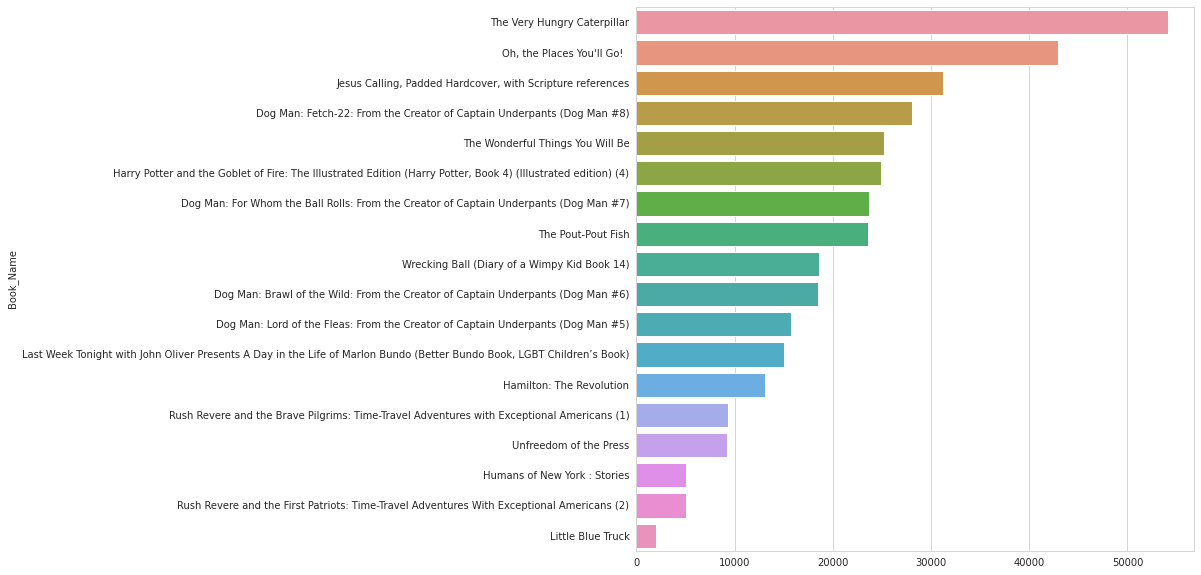

In [ ]:
y= x.groupby("Book_Name").No_of_Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



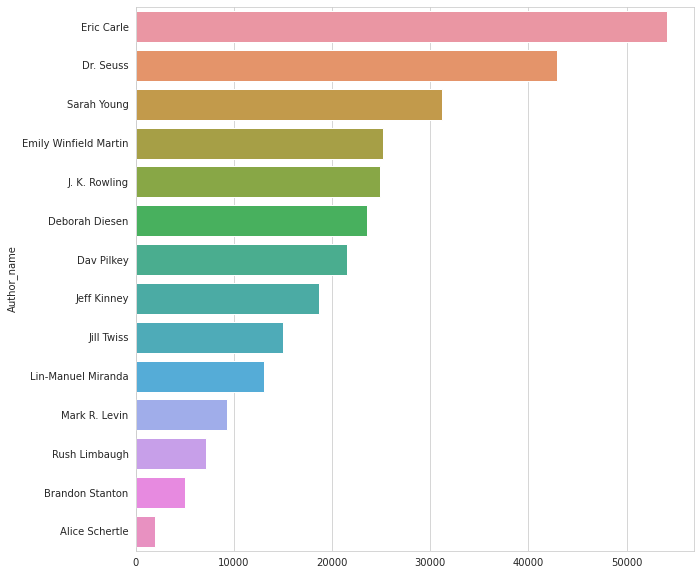

In [ ]:
y= x.groupby("Author_name").No_of_Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)
plt.show()

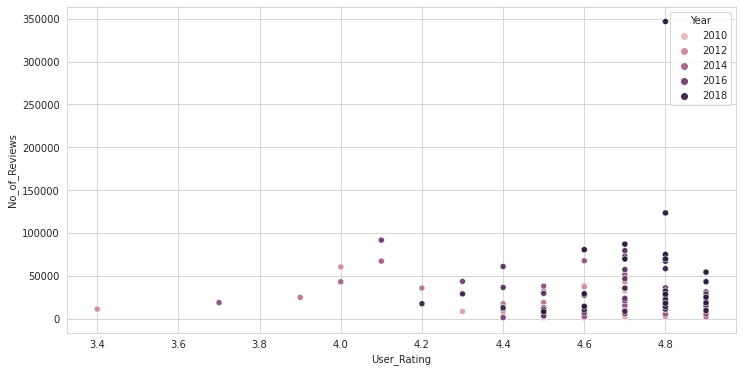

In [ ]:
plt.figure(figsize= (12,6))
sns.scatterplot(x="User_Rating",y= "No_of_Reviews",data= book_df,hue= "Year")

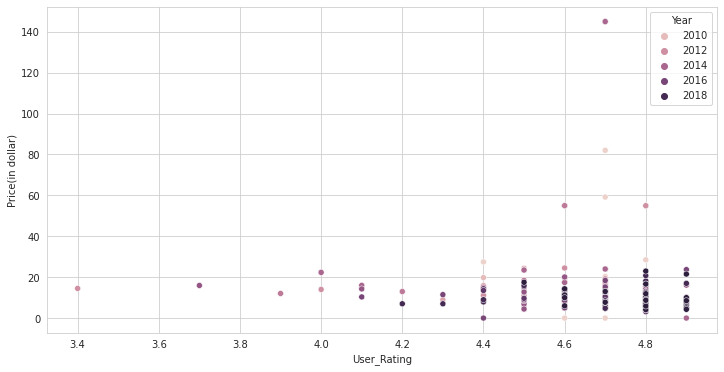

In [ ]:
plt.figure(figsize= (12,6))
sns.scatterplot(x="User_Rating",y= "Price(in dollar)",data= book_df,hue= "Year")

##Which book has high Sales Rating?


In [ ]:
book_df.head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
0,2009,The Lost Symbol,Dan Brown,4.4,16136,14.71
1,2009,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,23402,10.43
2,2009,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,5037,9.94
3,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,16930,10.54
4,2009,Going Rogue: An American Life,Sarah Palin,4.6,1572,10.00


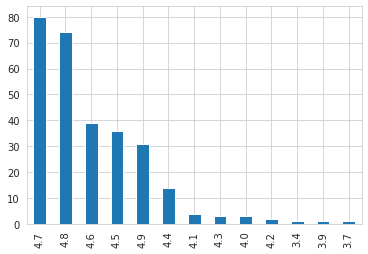

In [ ]:
book_df["User_Rating"].value_counts().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



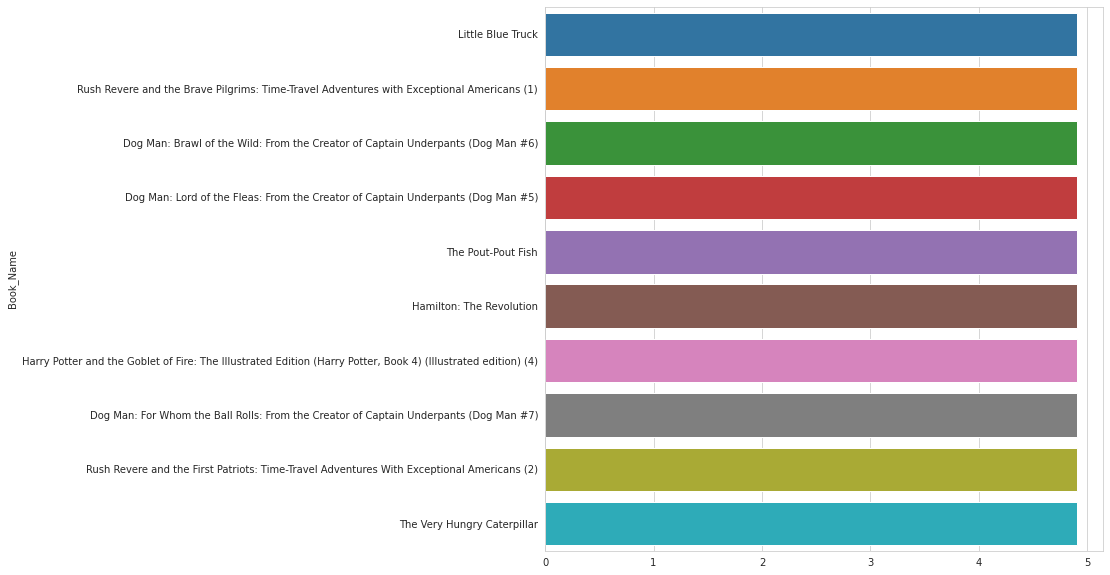

In [ ]:
y = book_df.groupby("Book_Name")["User_Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)
plt.show()

In [ ]:
#Best selling author Author  based on mean review
len(book_df["Author_name"].unique())

141

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



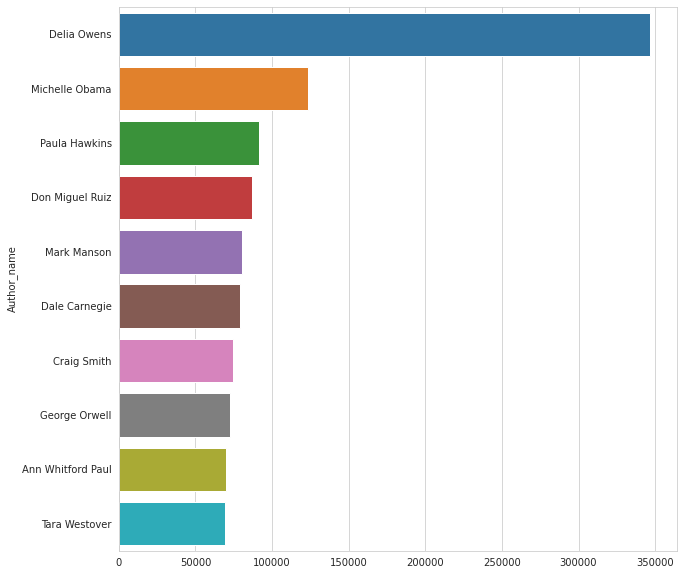

In [ ]:
y = book_df.groupby("Author_name")["No_of_Reviews"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)
plt.show()

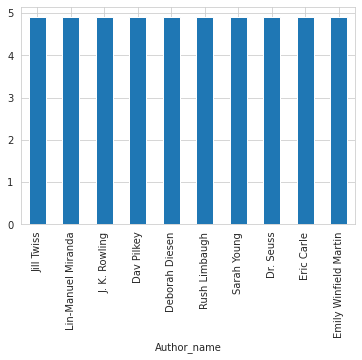

In [ ]:
#best selling author base pn rating
book_df.groupby("Author_name")["User_Rating"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

##Which book has lowest customer’s review?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



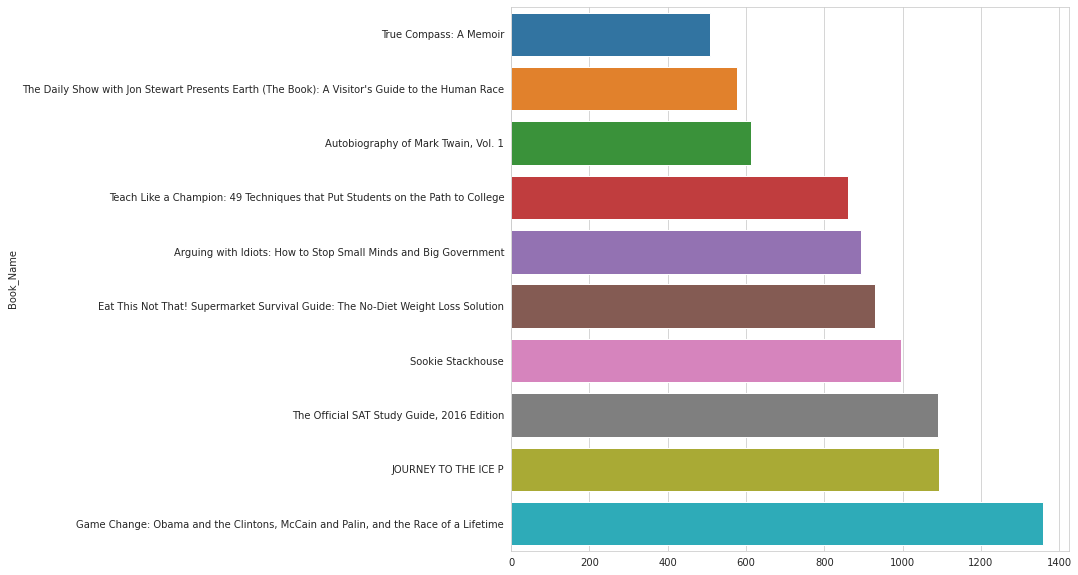

In [ ]:

y=book_df.groupby("Book_Name")["No_of_Reviews"].mean().sort_values(ascending=True).head(10)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)
plt.show()

## Which book has highest rating?

##Which book has lowest price but high rating?


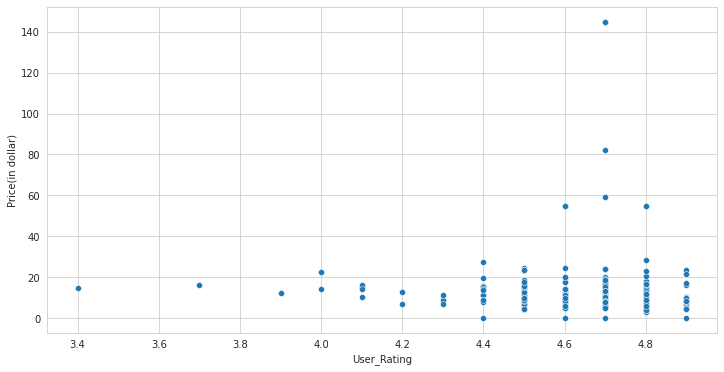

In [ ]:
#Check correlation between 
plt.figure(figsize= (12,6))
sns.scatterplot(x="User_Rating",y= "Price(in dollar)",data = book_df)

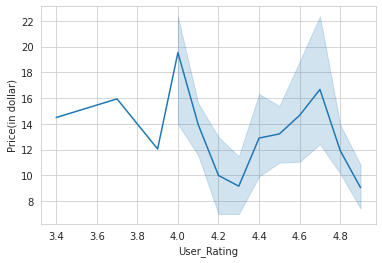

In [ ]:
sns.lineplot(x="User_Rating",y= "Price(in dollar)",data = book_df)

**Trend over the year**

In [ ]:
book_df.head()

,Year,Book_Name,Author_name,User_Rating,No_of_Reviews,Price(in dollar)
0,2009,The Lost Symbol,Dan Brown,4.4,16136,14.71
1,2009,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,23402,10.43
2,2009,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,5037,9.94
3,2009,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,16930,10.54
4,2009,Going Rogue: An American Life,Sarah Palin,4.6,1572,10.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



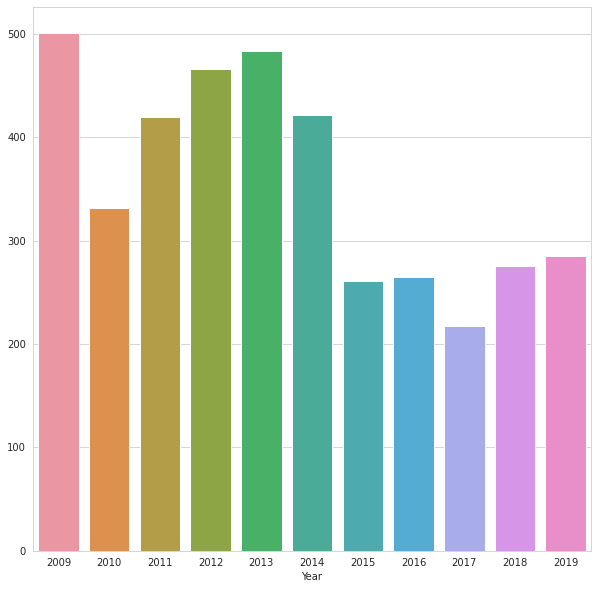

In [ ]:
#Total book prices over the year
y = book_df.groupby("Year")["Price(in dollar)"].sum().sort_values(ascending=False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.index,y.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



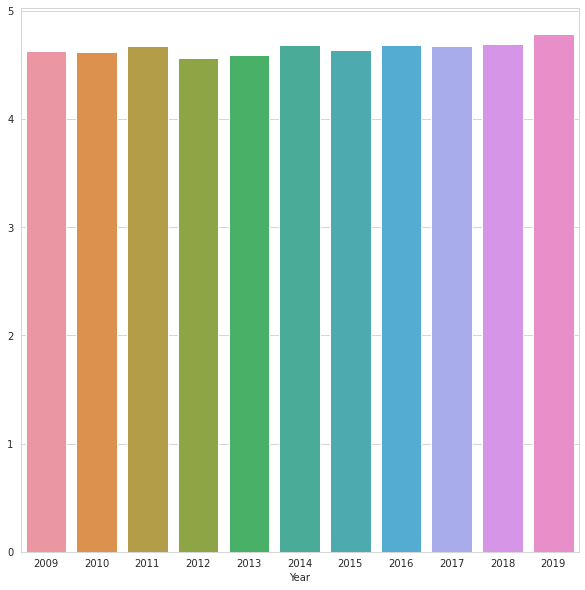

In [ ]:
#Mean rating over the year
y = book_df.groupby("Year")["User_Rating"].mean().sort_values(ascending=False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.index,y.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



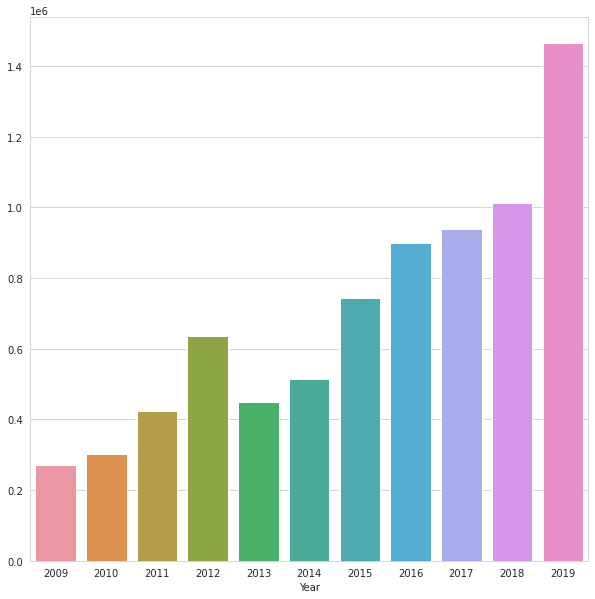

In [ ]:
#Total reviews over the year
y = book_df.groupby("Year")["No_of_Reviews"].sum().sort_values(ascending=False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.index,y.values)
plt.show()

In [ ]:
plt.figure(figsize= (12,6))
sns.lineplot(x= "Year",y= "Reviews",data= book_df,hue="Genre")

##Which book has lowest rating?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



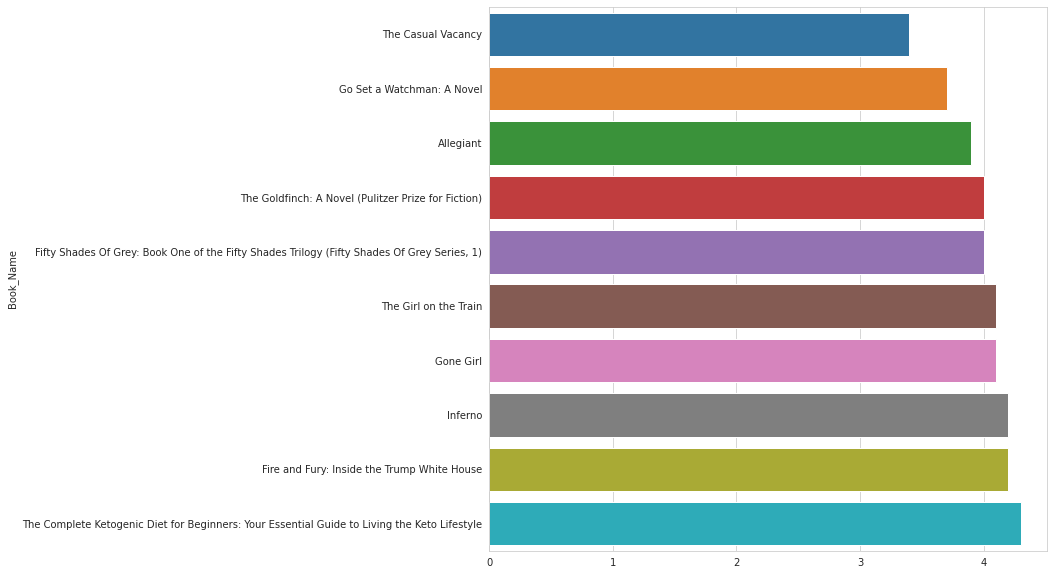

In [ ]:
y=book_df.groupby("Book_Name")["User_Rating"].mean().sort_values(ascending=True).head(10)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)
plt.show()

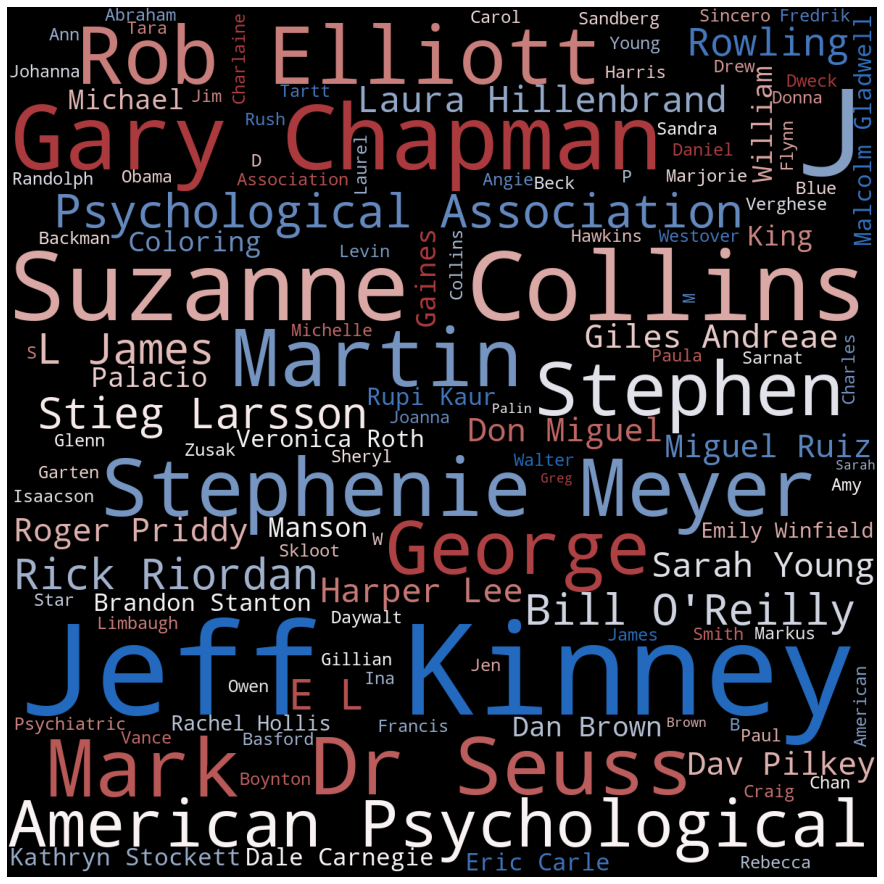

In [ ]:
#Display common author names
from wordcloud import WordCloud

text=' '.join(book_df['Author_name'])

plt.rcParams['figure.figsize']=(16,16)
wordcloud=WordCloud(background_color='black', colormap='vlag', 
                    width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()